Import the libraries we need for today's lab.  We'll be using the OpenCV in the pip repository (see lab slides on how to install).  We won't be covering NumPy today, but we're going to use it just to do some simple operations.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Commands that you see with % are for jupyter, so don't include them in your code.  This line above with run show matplotlib plots in our notebook instead of opening a window.

In [2]:
print("Version of opencv = ", cv2.__version__)

Version of opencv =  4.0.0-pre


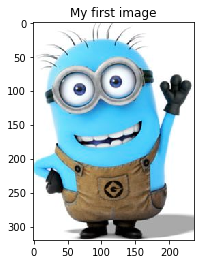

In [3]:
#TODO: use imread instead
def download_image(image_url):
    import urllib.request 
    image = None
    with urllib.request.urlopen(image_url) as url:
        image = np.asarray(bytearray(url.read()), dtype=np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

def plot_image(img, title, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    
image = download_image("http://clipart-library.com/img/1393953.jpg")
plot_image(image, "My first image")

Why does this look so funky?  This is because OpenCV opens images in <b>BGR</b> (Blue-Green-Red) channel ordering and Matplotlib (and other libraries!) assume the image is in RGB. So we need to reorder the channels.  There are two ways you can do this: use the built-in colorspace conversions (more on this later) or just use matrix indexing magic.

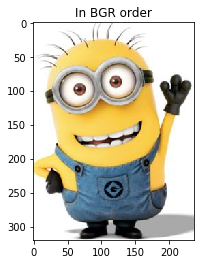

In [4]:
image = image[:,:,::-1]
plot_image(image, "In BGR order")

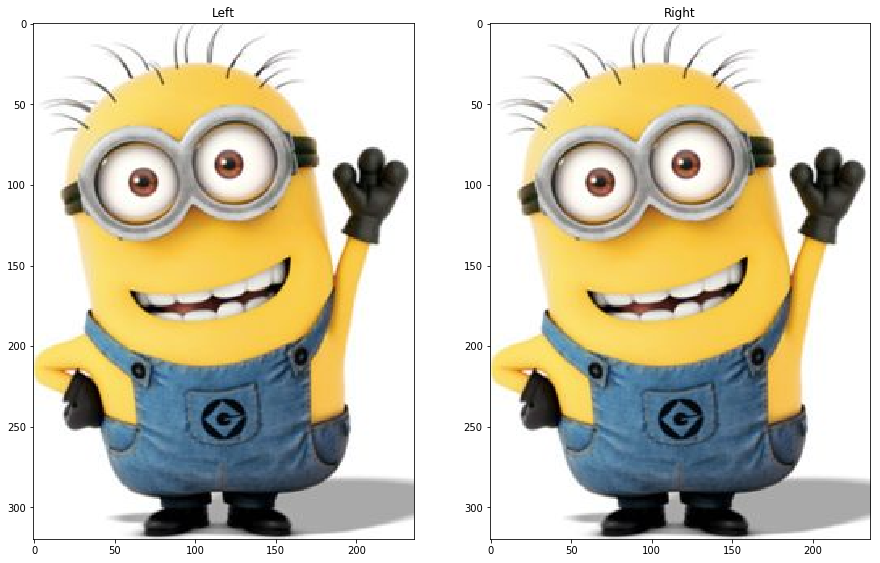

In [5]:
def plot_two_images(image_A, title_A, image_B, title_B, figsize=(15, 15)):
    """Plots two images side by side"""
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plot_image(image_A, title_A)

    plt.subplot(1, 2, 2)
    plot_image(image_B, title_B)

plot_two_images(image, "Left", image, "Right")

In [6]:
left = image
right = image
cv2.circle(right, (100,100), radius=5, color=(0,255,0), thickness=3)

TypeError: Layout of the output array img is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

In [ ]:
left = image
right = image.copy()
right = cv2.circle(right, (100,100), radius=75, color=(0,255,0), thickness=3)
plot_two_images(left, "Left", right, "Right")

In [ ]:
right = cv2.circle(right, (100,100), radius=75, color=(255,255,0), thickness=-3)
plot_two_images(left, "Left", right, "Right")

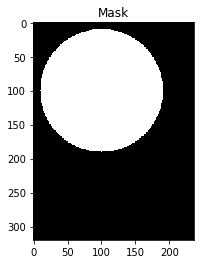

In [7]:
mask = np.zeros(left.shape[:2], dtype=np.uint8)
mask = cv2.circle(mask, (100,100), radius=90, color=255, thickness=-3)

plot_image(mask, "Mask", cmap='gray')

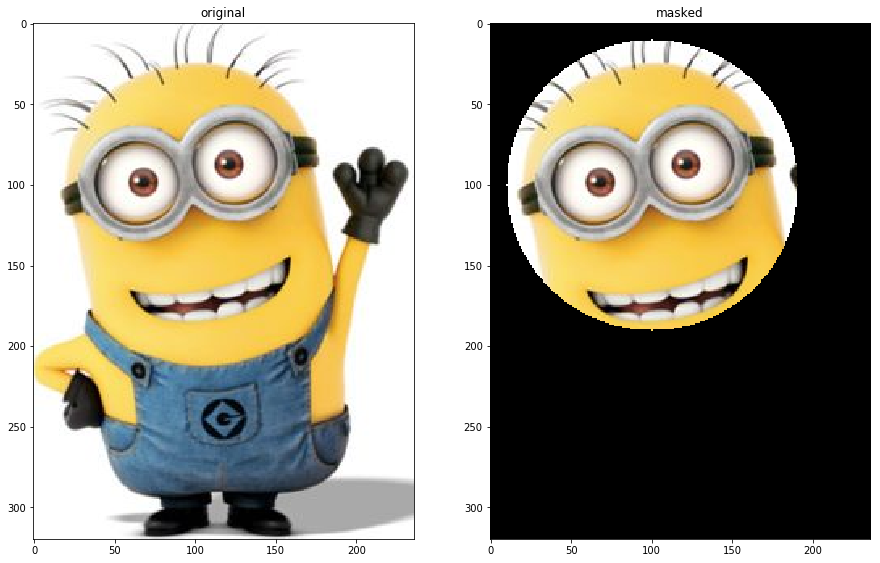

In [8]:
output = cv2.bitwise_and(left, left, mask=mask)
plot_two_images(left, "original", output, "masked")